# IPL Match Analysis and Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
## load the dataset
matches_df=pd.read_csv('F:/DataSciencePractise/MachineLearningLab/datasets/ipl/matches.csv')
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches_df.shape

(756, 18)

In [5]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
deliveries_df=pd.read_csv('F:/DataSciencePractise/MachineLearningLab/datasets/ipl/deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Exploratory Data Analysis

In [8]:
matches_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [9]:
matches_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [17]:
#checking for missing values 
matches_df[matches_df['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [18]:
matches_df[matches_df['winner'].isnull()==True].winner

Series([], Name: winner, dtype: object)

In [16]:
# replacing null values
matches_df['winner'].fillna('Draw',inplace=True)

In [19]:
matches_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Draw                             4
Name: winner, dtype: int64

In [21]:
team_encodings={
    "Mumbai Indians":1,
    "Kolkata Knight Riders":2,
    "Royal Challengers Bangalore":3,
    "Deccan Chargers":4,
    "Chennai Super Kings":5,
    "Rajasthan Royals":6,
    "Delhi Daredevils":7,
    "Gujarat Lions":8,
    "Kings XI Punjab":9,
    "Sunrisers Hyderabad":10,
    "Rising Pune Supergiant":11,
    "Rising Pune Supergiants":11,
    "Kochi Tuskers Kerala":12,
    "Pune Warriors":13,
    "Delhi Capitals":14,
    "Draw":15
    
}
team_encodings_new={
    "Mumbai Indians":1,
    "Kolkata Knight Riders":2,
    "Royal Challengers Bangalore":3,
    "Deccan Chargers":4,
    "Sunrisers Hyderabad":4,
    "Chennai Super Kings":5,
    "Rajasthan Royals":6,
    "Delhi Daredevils":7,
    "Delhi Capitals":7,
    "Gujarat Lions":8,
    "Kings XI Punjab":9,
    "Pune Warriors":10,
    "Rising Pune Supergiant":10,
    "Rising Pune Supergiants":10,
    "Kochi Tuskers Kerala":11,
    "Draw":12
    
}

In [22]:
team_encode_dict={
    'team1':team_encodings,
    'team2':team_encodings,
    'toss_winner':team_encodings,
    'winner':team_encodings
}

In [23]:
matches_df.replace(team_encode_dict,inplace=True)

In [24]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [27]:
matches_df['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64

In [28]:
# missing values in the city column
matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [30]:
matches_df[matches_df['city'].isna()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [31]:
matches_df['city'].fillna('Dubai',inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [32]:
matches_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


# toss wins and match wins by each team

In [39]:
toss_wins=matches_df['toss_winner'].value_counts(sort=True)
toss_wins
for idx,val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 98
Kolkata Knight Riders -> 92
Chennai Super Kings -> 89
Kings XI Punjab -> 81
Royal Challengers Bangalore -> 81
Delhi Daredevils -> 80
Rajasthan Royals -> 80
Sunrisers Hyderabad -> 46
Deccan Chargers -> 43
Kochi Tuskers Kerala -> 20
Gujarat Lions -> 15
Rising Pune Supergiant -> 13
Pune Warriors -> 10
Rising Pune Supergiants -> 8


In [40]:
match_wins=matches_df['winner'].value_counts(sort=True)
match_wins
for idx,val in match_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {match_wins[idx]}")

Mumbai Indians -> 109
Chennai Super Kings -> 100
Kolkata Knight Riders -> 92
Royal Challengers Bangalore -> 84
Kings XI Punjab -> 82
Rajasthan Royals -> 75
Delhi Daredevils -> 67
Sunrisers Hyderabad -> 58
Deccan Chargers -> 29
Rising Pune Supergiant -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Pune Warriors -> 10
Rising Pune Supergiants -> 6
Delhi Capitals -> 4


<AxesSubplot:>

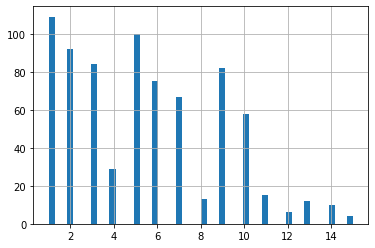

In [42]:
matches_df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match Winners')

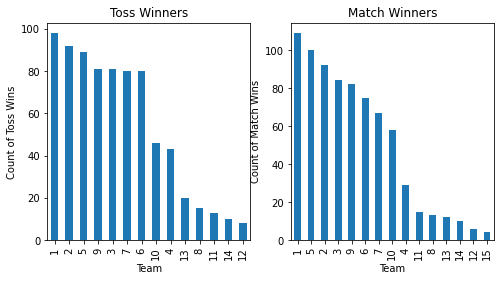

In [49]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of Toss Wins')
ax1.set_title('Toss Winners')
toss_wins.plot(kind='bar')


ax2=fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of Match Wins')
ax2.set_title('Match Winners')

